# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps

# Import API key
from api_keys import api_key
from api_keys import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [36]:
#test_cities = cities[0:20]
#test_cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
# Define initial url and preferred units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# Get data for each city in cities.csv
cities_pd = pd.DataFrame()

cities_pd["City"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Humidity"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""

#cities_pd.rename(columns= {'0':'City'})
#cities_pd.head()

# response = requests.get(query_url + cities[0]).json()
# print(response)
# print(query_url + cities[0])

In [38]:
record = 0

print(f"Beginning Data Retrieval")
print("--------------------------")

# Loop through cities and print progress and any skips
# This will also keep track of the number of cities pulled
for index, city in enumerate(cities):
    
    response = requests.get(query_url + city).json()
    #print(response)
    #print(query_url + city)
    #print(json.dumps(response, indent=4, sort_keys=True))
              
    try:
        cities_pd.loc[index, 'City'] = response['name']
        cities_pd.loc[index, 'Country'] = response['sys']['country']
        cities_pd.loc[index, 'Date'] = response['dt']
        cities_pd.loc[index, 'Lat'] = response['coord']['lat']
        cities_pd.loc[index, 'Lng'] = response['coord']['lon']
        cities_pd.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_pd.loc[index, 'Humidity'] = response['main']['humidity']
        cities_pd.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_pd.loc[index, 'Wind Speed'] = response['wind']['speed']

       
        set = (record // 50)  
        count = (record - (set * 50)) + 1
        record += 1
        
        print(f"Processing Record {count} of Set {set + 1} | {city}")
        print(query_url + city)
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")
        

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=fairbanks
Processing Record 2 of Set 1 | tecpan
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=tecpan
Processing Record 3 of Set 1 | haines junction
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=haines junction
Processing Record 4 of Set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=saskylakh
Processing Record 5 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=busselton
Processing Record 6 of Set 1 | naze
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=naze
Processing Record 7 of Set 1

Processing Record 3 of Set 2 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=thompson
Processing Record 4 of Set 2 | concepcion del oro
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=concepcion del oro
Processing Record 5 of Set 2 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=narsaq
Processing Record 6 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=tiksi
Processing Record 7 of Set 2 | praia
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=praia
Processing Record 8 of Set 2 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=new norfolk
Processing Record 9 of Set 2 | bredasdorp
http://api.openweathermap.org/data/2

Processing Record 6 of Set 3 | marystown
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=marystown
Processing Record 7 of Set 3 | daru
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=daru
Processing Record 8 of Set 3 | necochea
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=necochea
Processing Record 9 of Set 3 | hualmay
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=hualmay
Processing Record 10 of Set 3 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=leningradskiy
City not found. Skipping...
Processing Record 11 of Set 3 | buluang
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=buluang
Processing Record 12 of Set 3 | amahai
http://api.openweat

Processing Record 9 of Set 4 | nanjing
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=nanjing
Processing Record 10 of Set 4 | pahrump
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=pahrump
Processing Record 11 of Set 4 | puerto carreno
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=puerto carreno
Processing Record 12 of Set 4 | dogondoutchi
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=dogondoutchi
Processing Record 13 of Set 4 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=georgetown
Processing Record 14 of Set 4 | ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=ambilobe
City not found. Skipping...
Processing Record 15 of Set 4 | bro

Processing Record 12 of Set 5 | miri
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=miri
Processing Record 13 of Set 5 | kumano
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=kumano
Processing Record 14 of Set 5 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=komsomolskiy
Processing Record 15 of Set 5 | wucheng
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=wucheng
Processing Record 16 of Set 5 | bacolod
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=bacolod
Processing Record 17 of Set 5 | parnarama
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=parnarama
Processing Record 18 of Set 5 | hilo
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 16 of Set 6 | dombarovskiy
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=dombarovskiy
Processing Record 17 of Set 6 | pastos bons
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=pastos bons
Processing Record 18 of Set 6 | atherton
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=atherton
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 6 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=kudahuvadhoo
Processing Record 20 of Set 6 | ribeira brava
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=ribeira brava
City not found. Skipping...
Processing Record 21 of Set 6 | atambua
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a

Processing Record 18 of Set 7 | gornoye loo
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=gornoye loo
Processing Record 19 of Set 7 | grahamstown
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=grahamstown
Processing Record 20 of Set 7 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=hambantota
Processing Record 21 of Set 7 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=tuatapere
Processing Record 22 of Set 7 | santa maria
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=santa maria
Processing Record 23 of Set 7 | bonthe
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=bonthe
Processing Record 24 of Set 7 | bojnurd
http://api.openweather

City not found. Skipping...
Processing Record 21 of Set 8 | vysokogornyy
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=vysokogornyy
Processing Record 22 of Set 8 | shinshiro
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=shinshiro
Processing Record 23 of Set 8 | tessalit
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=tessalit
City not found. Skipping...
Processing Record 24 of Set 8 | luoyang
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=luoyang
Processing Record 25 of Set 8 | atar
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=atar
Processing Record 26 of Set 8 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=faanui
Processing Record 27 of Set 8 

Processing Record 24 of Set 9 | barstow
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=barstow
City not found. Skipping...
Processing Record 25 of Set 9 | qorveh
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=qorveh
Processing Record 26 of Set 9 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=meulaboh
Processing Record 27 of Set 9 | broken hill
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=broken hill
Processing Record 28 of Set 9 | leh
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=leh
Processing Record 29 of Set 9 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=husavik
Processing Record 30 of Set 9 | dingle
http://api.openweathermap.o

Processing Record 26 of Set 10 | kota
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=kota
City not found. Skipping...
Processing Record 27 of Set 10 | cabimas
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=cabimas
Processing Record 28 of Set 10 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=geraldton
Processing Record 29 of Set 10 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=hervey bay
Processing Record 30 of Set 10 | riverton
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=riverton
Processing Record 31 of Set 10 | zwedru
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=zwedru
Processing Record 32 of Set 10 | sayyan
http://api.openw

Processing Record 29 of Set 11 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=bandarbeyla
Processing Record 30 of Set 11 | cubuk
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=cubuk
Processing Record 31 of Set 11 | gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=gornopravdinsk
Processing Record 32 of Set 11 | ranfurly
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=ranfurly
Processing Record 33 of Set 11 | ridgecrest
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=ridgecrest
Processing Record 34 of Set 11 | sokolo
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=sokolo
City not found. Skipping...
Processing Record 35 of Set 11 | bal

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
cities_pd.head()

,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,Fairbanks,US,1554565725,64.84,-147.72,20,53,25,6.93
1,Tecpan,GT,1554565665,14.76,-90.99,40,68,69.8,6.93
2,Haines Junction,CA,1554566041,60.75,-137.51,56,80,11.96,1.61
3,Saskylakh,RU,1554565920,71.97,114.09,44,78,15.65,16.26
4,Busselton,AU,1554565877,-33.64,115.35,24,51,55.99,9.66


In [40]:
cities_pd.to_csv("./output_data/Cities_Weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

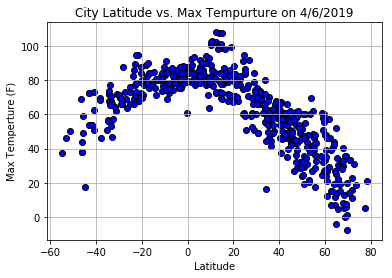

<Figure size 432x288 with 0 Axes>

In [45]:
plt.scatter(cities_pd['Lat'], cities_pd['Max Temp'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Max Tempurture on 4/6/2019')
plt.xlabel('Latitude')
plt.ylabel('Max Temperture (F)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Max_Tempurture.png')

#### Latitude vs. Humidity Plot

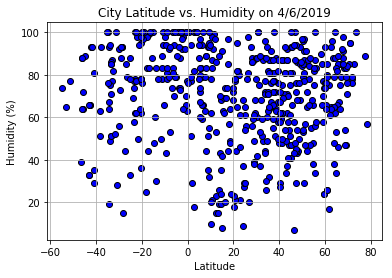

<Figure size 432x288 with 0 Axes>

In [46]:
plt.scatter(cities_pd['Lat'], cities_pd['Humidity'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Humidity on 4/6/2019')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

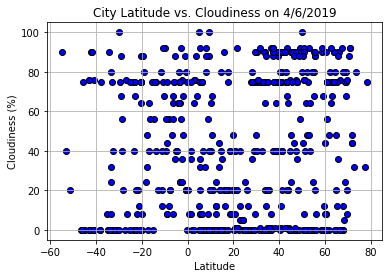

<Figure size 432x288 with 0 Axes>

In [47]:
plt.scatter(cities_pd['Lat'], cities_pd['Cloudiness'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Cloudiness on 4/6/2019')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

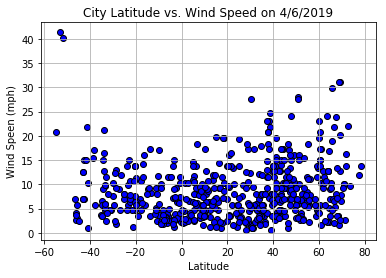

<Figure size 432x288 with 0 Axes>

In [48]:
plt.scatter(cities_pd['Lat'], cities_pd['Wind Speed'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Wind Speed on 4/6/2019')
plt.xlabel('Latitude')
plt.ylabel('Wind Speen (mph)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Wind_Speed.png')

In [56]:
# Store latitude and longitude in locations
locations = cities_pd[["Lat", "Lng"]]

max_temp = cities_pd["Max Temp"]

weights_temp = []
for temp in max_temp:
    if temp > 0:
        weights_temp.append(temp)
    else:
        temp = 0
        weights_temp.append(temp)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=weights_temp, 
                                 dissipating=False, max_intensity=50,
                                 point_radius=.5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))